In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities=[]
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-paul
Processing Record 2 of Set 1 | marfino
Processing Record 3 of Set 1 | sola
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | bowen
Processing Record 9 of Set 1 | changji
Processing Record 10 of Set 1 | sao lourenco do sul
Processing Record 11 of Set 1 | batticaloa
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | hirara
Processing Record 14 of Set 1 | pemangkat
Processing Record 15 of Set 1 | tripoli
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | muhos
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set

Processing Record 35 of Set 4 | marabba
Processing Record 36 of Set 4 | adrar
Processing Record 37 of Set 4 | tenenkou
Processing Record 38 of Set 4 | samusu
City not found. Skipping...
Processing Record 39 of Set 4 | tura
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | fort-shevchenko
Processing Record 42 of Set 4 | camalu
Processing Record 43 of Set 4 | dubbo
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | jaen
Processing Record 46 of Set 4 | khatanga
Processing Record 47 of Set 4 | gondanglegi
Processing Record 48 of Set 4 | rechitsy
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 50 of Set 4 | sakakah
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | tautira
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | labutta
City not found. Skipping...
Processing Record 5 of Set 5 | cockburn town
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | grand river sou

Processing Record 22 of Set 8 | erbaa
Processing Record 23 of Set 8 | sahrak
City not found. Skipping...
Processing Record 24 of Set 8 | mbaiki
Processing Record 25 of Set 8 | maiduguri
Processing Record 26 of Set 8 | karatau
Processing Record 27 of Set 8 | los llanos de aridane
Processing Record 28 of Set 8 | sapouy
Processing Record 29 of Set 8 | kendari
Processing Record 30 of Set 8 | cap-aux-meules
Processing Record 31 of Set 8 | vila praia de ancora
Processing Record 32 of Set 8 | dzaoudzi
Processing Record 33 of Set 8 | vangaindrano
Processing Record 34 of Set 8 | sorland
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | kabanjahe
Processing Record 37 of Set 8 | punakha
Processing Record 38 of Set 8 | tecoh
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | malamig
Processing Record 41 of Set 8 | ilorin
Processing Record 42 of Set 8 | olga
Processing Record 43 of Set 8 | lakota
Processing Record 44 of Set 8 | pingzhuang
Processin

Processing Record 9 of Set 12 | havoysund
Processing Record 10 of Set 12 | raga
Processing Record 11 of Set 12 | kirkwall
Processing Record 12 of Set 12 | kushmurun
Processing Record 13 of Set 12 | abu zabad
Processing Record 14 of Set 12 | newport
Processing Record 15 of Set 12 | noyabrsk
Processing Record 16 of Set 12 | ocampo
Processing Record 17 of Set 12 | gamba
Processing Record 18 of Set 12 | sioux lookout
Processing Record 19 of Set 12 | takayama
Processing Record 20 of Set 12 | stornoway
Processing Record 21 of Set 12 | walvis bay
Processing Record 22 of Set 12 | haapiti
Processing Record 23 of Set 12 | monforte de lemos
Processing Record 24 of Set 12 | usinsk
Processing Record 25 of Set 12 | tezu
Processing Record 26 of Set 12 | olafsvik
Processing Record 27 of Set 12 | nikolsk
Processing Record 28 of Set 12 | trincomalee
Processing Record 29 of Set 12 | sayyan
Processing Record 30 of Set 12 | katangli
Processing Record 31 of Set 12 | kutum
Processing Record 32 of Set 12 | sa

In [9]:
len(city_data)

557

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Paul,-21.0096,55.2707,66.29,74,0,2.01,RE,2021-09-21 21:32:40
1,Marfino,55.7028,37.3822,43.05,93,90,11.18,RU,2021-09-21 21:32:41
2,Sola,-13.8833,167.5500,77.67,94,90,5.75,VU,2021-09-21 21:32:41
3,Castro,-24.7911,-50.0119,67.60,87,84,10.42,BR,2021-09-21 21:32:42
4,Rikitea,-23.1203,-134.9692,73.92,71,1,14.09,PF,2021-09-21 21:32:43


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Paul,RE,2021-09-21 21:32:40,-21.0096,55.2707,66.29,74,0,2.01
1,Marfino,RU,2021-09-21 21:32:41,55.7028,37.3822,43.05,93,90,11.18
2,Sola,VU,2021-09-21 21:32:41,-13.8833,167.5500,77.67,94,90,5.75
3,Castro,BR,2021-09-21 21:32:42,-24.7911,-50.0119,67.60,87,84,10.42
4,Rikitea,PF,2021-09-21 21:32:43,-23.1203,-134.9692,73.92,71,1,14.09


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
#import time
# Get today's date in seconds.
#today = time.strftime("%x")
#today

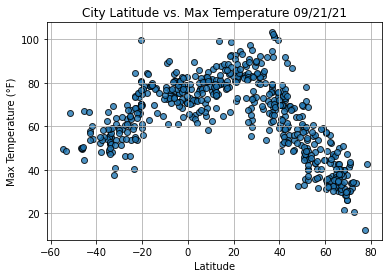

In [15]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temp,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

plt.savefig("weather_data/fig1.png")

plt.show()

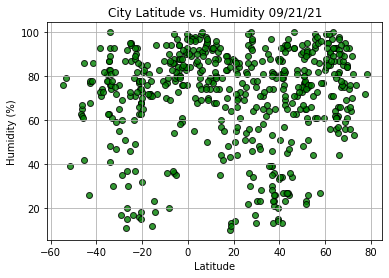

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", facecolor="green", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("weather_data/fig2.png")

plt.show()

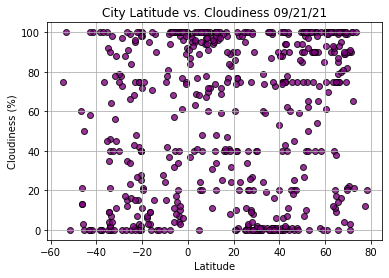

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", facecolor="purple", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("weather_data/fig3.png")

plt.show()

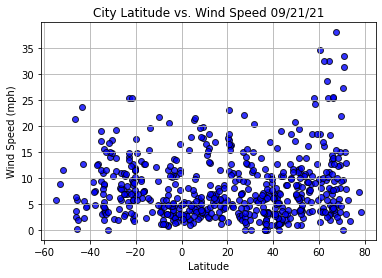

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", facecolor="blue", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("weather_data/fig4.png")

plt.show()

In [82]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regress(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values*slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates, fontsize=14, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [83]:
index13 = city_data_df.loc[13]
index13

City                      Tripoli
Country                        LY
Date          2021-09-21 21:31:17
Lat                       32.8752
Lng                       13.1875
Max Temp                     83.1
Humidity                       58
Cloudiness                     24
Wind Speed                  10.49
Name: 13, dtype: object

In [84]:
city_data_df.loc[(city_data_df["Lat"]>= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Marfino,RU,2021-09-21 21:32:41,55.7028,37.3822,43.05,93,90,11.18
5,Nikolskoye,RU,2021-09-21 21:32:43,59.7035,30.7861,44.49,83,100,5.79
7,Changji,CN,2021-09-21 21:32:44,44.0167,87.3167,56.19,26,0,4.47
9,Batticaloa,LK,2021-09-21 21:32:45,7.7102,81.6924,80.28,75,97,3.60
10,Saint George,US,2021-09-21 21:32:22,37.1041,-113.5841,91.87,13,1,1.99


In [85]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

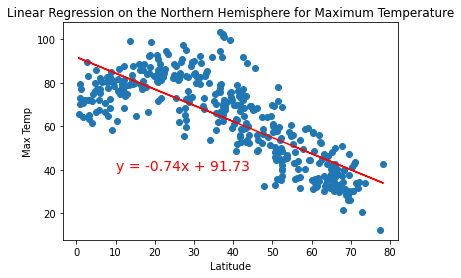

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regress(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

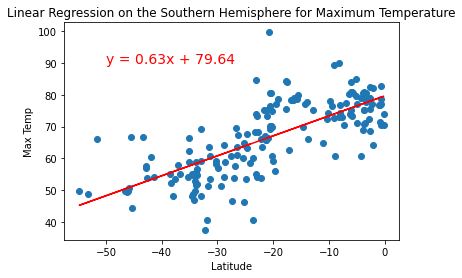

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                   'Max Temp', (-50,90))

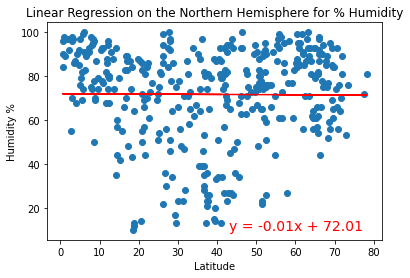

In [90]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity',
                   'Humidity %', (43,10))

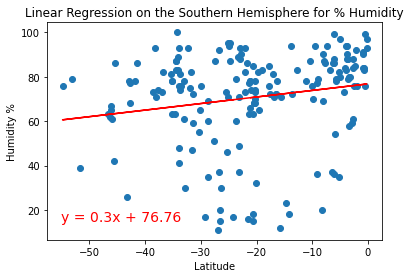

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity',
                   'Humidity %', (-55,15))

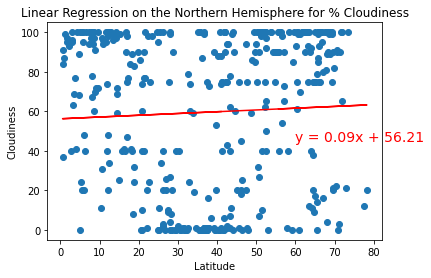

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness',
                   'Cloudiness', (60,45))

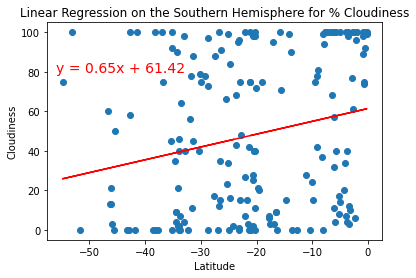

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness',
                   'Cloudiness', (-56,80))

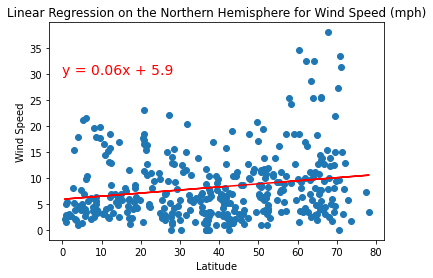

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed (mph)',
                   'Wind Speed', (0,30))

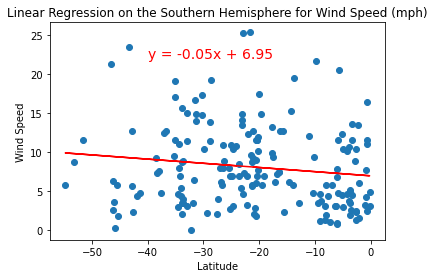

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regress(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed (mph)',
                   'Wind Speed', (-40,22))

In [118]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

LinregressResult(slope=0.05916514229462051, intercept=5.895505975167938, rvalue=0.19034546345712522, pvalue=0.00019720391093797895, stderr=0.015736779064458768, intercept_stderr=0.6882226127466958)